In [1]:
import pandas as pd
import numpy as np
from utils import *
from data_processing import *
import matplotlib.pyplot as plt
import pathlib

In [28]:
import biosppy
import pyhrv.tools as tools

ecg_signal = load_ecg("training/train_ecg_02544.mat")
#ecg_signal = load_ecg("train_ecg_02544.mat")

signal, rpeaks, _, templates = biosppy.signals.ecg.ecg(ecg_signal, show=False, sampling_rate=300)[1:5]

nni = tools.nn_intervals(rpeaks)

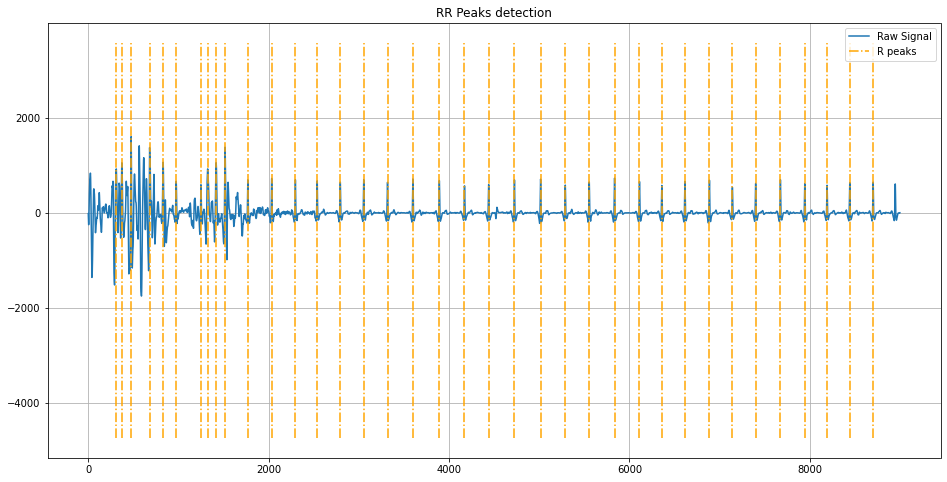

In [29]:
plt.figure(1, (16,8))

plt.title("RR Peaks detection")

plt.plot(signal)

# plot R peaks
plt.vlines(rpeaks, linestyles="dashdot", ymin=ecg_signal.min(), ymax=ecg_signal.max(), colors="orange")

plt.grid()

plt.legend(["Raw Signal", "R peaks"])

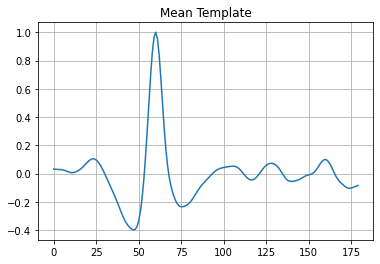

In [30]:
mean_template = np.mean(templates[:], axis=0)
mean_template = mean_template/mean_template.max() # normalize
plt.title("Mean Template")
plt.plot(mean_template)
plt.grid()

In [31]:
templates = templates / templates.max()

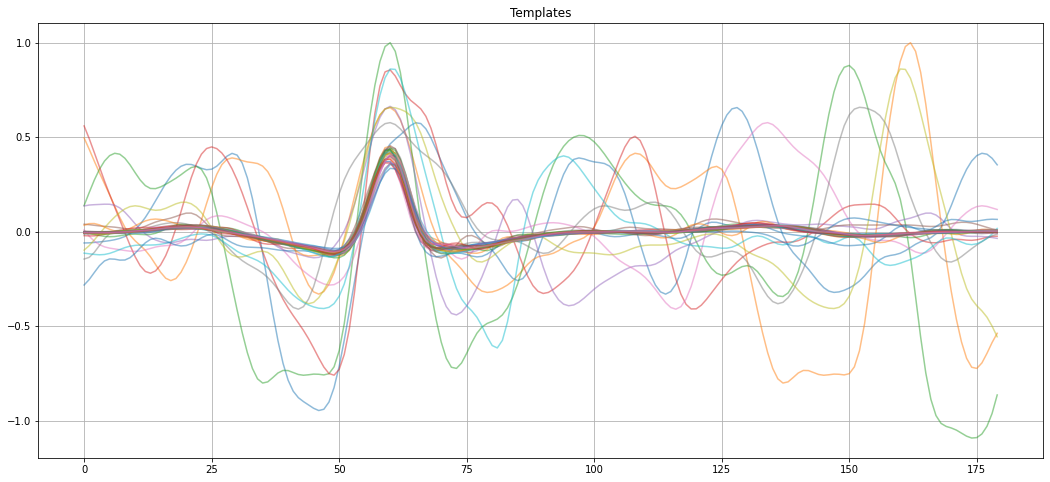

In [32]:
plt.figure(1, (18, 8))
plt.title("Templates")
plt.plot(np.transpose(templates[:]), alpha=0.5)
plt.grid()

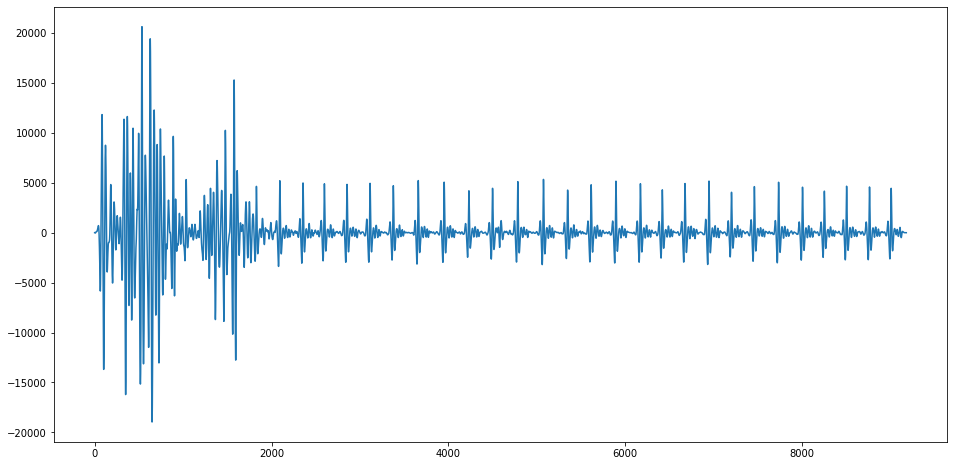

In [33]:
import scipy
plt.figure(1, (16,8))
plt.plot(scipy.signal.oaconvolve(signal,mean_template, mode="full"))

(array([[1.93123803e+02, 1.61890854e+02, 9.77508431e+02, ...,
         7.03767175e-01, 4.75452022e+00, 3.53607722e-01],
        [8.54688985e+02, 9.16960460e+02, 1.19169132e+04, ...,
         1.63054213e+00, 1.31114289e+01, 2.06664101e+00],
        [8.91144662e+02, 4.84928175e+03, 7.15100680e+02, ...,
         1.20005667e+01, 8.53626826e+01, 1.82701706e+01],
        ...,
        [1.57040802e-11, 4.71535490e-10, 1.90378627e-10, ...,
         9.29938032e-10, 1.44141824e-14, 4.84613681e-10],
        [1.58783484e-11, 4.71742768e-10, 1.51226289e-10, ...,
         9.07170634e-10, 9.93560050e-15, 4.71858964e-10],
        [7.45234030e-12, 2.32284142e-10, 7.08614327e-11, ...,
         4.49778477e-10, 4.73735017e-15, 2.33900388e-10]]),
 array([  0.      ,   1.171875,   2.34375 ,   3.515625,   4.6875  ,
          5.859375,   7.03125 ,   8.203125,   9.375   ,  10.546875,
         11.71875 ,  12.890625,  14.0625  ,  15.234375,  16.40625 ,
         17.578125,  18.75    ,  19.921875,  21.09375 ,  22.2

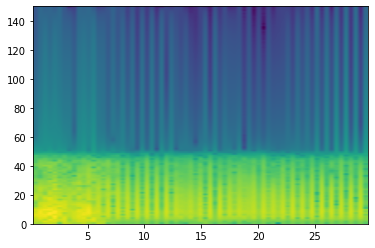

In [34]:
plt.specgram(signal, Fs=300)

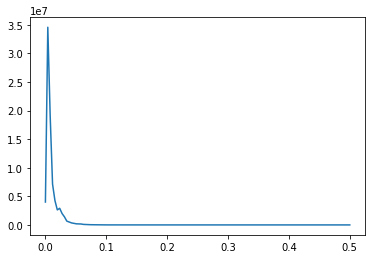

In [35]:
psd_f, psd = scipy.signal.welch(ecg_signal)# power spectral density
plt.plot(psd_f, psd)

In [52]:
LF = [0.05, 0.15] # low frequency band
HF = [0.15, 0.4] # high frequency band

In [54]:
psd_f_lf = psd_f[(psd_f > LF[0]) & (psd_f <= LF[1])]
psd_lf = psd[(psd_f > LF[0]) & (psd_f <= LF[1])]

In [56]:
psd_f_hf = psd_f[(psd_f > HF[0]) & (psd_f <= HF[1])]
psd_hf = psd[(psd_f > HF[0]) & (psd_f <= HF[1])]

In [58]:
LF_power = np.trapz(psd_lf, psd_f_lf)
HF_power = np.trapz(psd_hf, psd_f_hf)

In [59]:
LF_power

3384.152152776718

In [60]:
HF_power

3.2429114799015224

In [69]:
def calculate_spectral_powers(signal: np.array, LF: np.array = [0.05, 0.15], HF: np.array = [0.15, 0.4]):
    psd_f, psd = scipy.signal.welch(signal) # power spectral density

    psd_f_lf = psd_f[(psd_f > LF[0]) & (psd_f <= LF[1])]
    psd_lf = psd[(psd_f > LF[0]) & (psd_f <= LF[1])]
    
    psd_f_hf = psd_f[(psd_f > HF[0]) & (psd_f <= HF[1])]
    psd_hf = psd[(psd_f > HF[0]) & (psd_f <= HF[1])]

    total_power = np.trapz(psd, psd_f)

    LF_power = np.trapz(psd_lf, psd_f_lf) # low frequency band
    HF_power = np.trapz(psd_hf, psd_f_hf) # high frequency band

    return LF_power/total_power, HF_power/total_power, LF_power/HF_power

In [70]:
calculate_spectral_powers(ecg_signal)

(0.309650433494153, 0.0002967268905775246, 1043.5536627350325)

In [71]:
calculate_spectral_powers(signal)

(0.309650433494153, 0.0002967268905775246, 1043.5536627350325)